## Imports

In [1]:
import os, pandas as pd, matplotlib.pyplot as plt, pandas_datareader.data as pdr, datetime
from datlib.plots import * 
from datlib.FRED import *

# Pandas DataReader FRED Function

In [28]:
# gather data from FRED

def gather_data_tb(data_code, 
                start, 
                end = datetime.datetime.today(), 
                freq = "M"):
    i = 0
    # dct.items() calls key and value that key points to
    for key, val in data_code.items():
        if i == 0:
            # Create dataframe for first variable, then rename column
            df = pdr.DataReader(
                val, "fred", start, end).resample(freq).mean()
            df.rename(columns = {val:key}, inplace = True) 
            # setting i to None will cause the next block of code to execute,
            # placing data within df instead of creating a new dataframe for
            # each variable
            i = None
        else:
            # If dataframe already exists, add new column
            df[key] = pdr.DataReader(val, "fred", start, end).resample(freq).mean()

    return df

### Assign pandas datareader timeseries to a 'df' variable. Resample it to quarterly and take the mean.

In [6]:
end = datetime.datetime.today()
start = datetime.datetime(1948,1,1)
df = pdr.DataReader("GDPC1", "fred", start, end).resample("Q").mean()


<Axes: xlabel='DATE'>

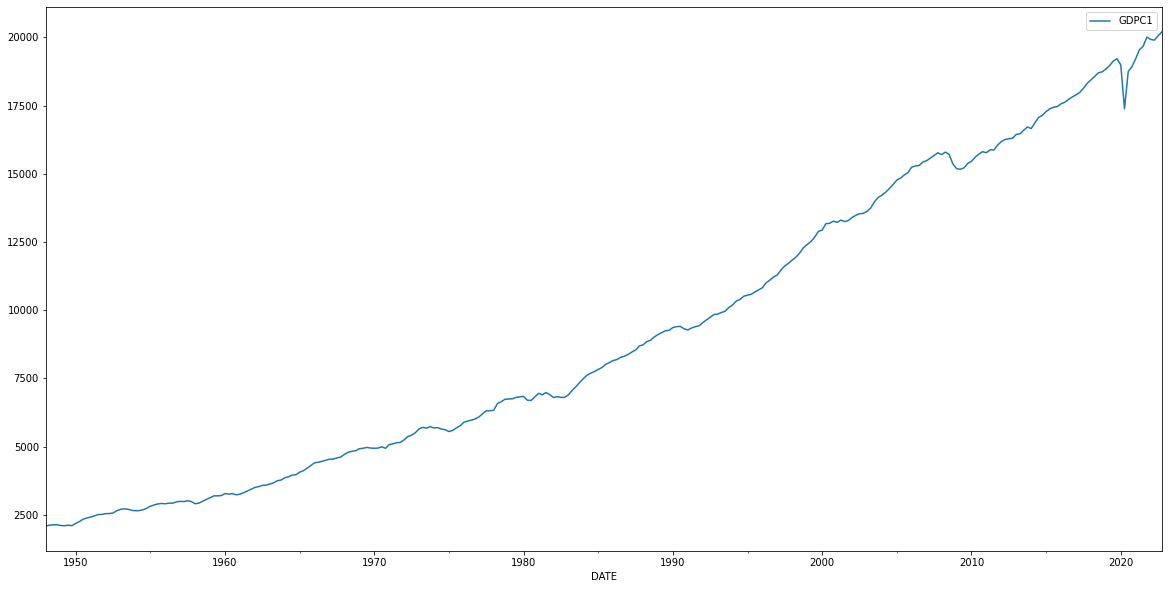

In [12]:
df.plot.line(figsize=(20, 10))

In [57]:
data_codes = {"Base: Total":"BOGMBASEW",
              "Base: Currency in Circulation": "WCURCIR"}


In [70]:
def gather_data(data_codes,start,end=datetime.datetime.today(),
                freq='M'):
    df_init = False
    for key, code in data_codes.items():
        if df_init == False:
            df = pdr.DataReader(
            code, "fred", start, end).resample(freq).mean() #.first() or .last()
            df.rename(columns = {code:key}, inplace=True)
            df_init = True
        else:
            df[key] = pdr.DataReader(
            code, "fred", start, end).resample(freq).mean()
    return df

In [71]:
start = datetime.datetime(2002,1,1)
zz = gather_data(data_codes, start, freq = 'W')

In [72]:
zz

,Base: Total,Base: Currency in Circulation
DATE,,
2002-01-06,659930.0,643.044
2002-01-13,659930.0,638.956
2002-01-20,652179.0,632.719
2002-01-27,652179.0,632.017
2002-02-03,649587.0,630.409
...,...,...
2020-08-16,4750981.0,2003.019
2020-08-23,4830999.0,2007.458
2020-08-30,4830999.0,2010.991


In [73]:
zz.iloc[-52:] # Give me the last 52 weeks.

,Base: Total,Base: Currency in Circulation
DATE,,
2019-09-22,3159026.0,1762.096
2019-09-29,3159026.0,1761.662
2019-10-06,3252373.0,1762.796
2019-10-13,3252373.0,1766.295
2019-10-20,3235853.0,1770.761
2019-10-27,3235853.0,1771.533
2019-11-03,3282965.0,1776.039
2019-11-10,3282965.0,1782.249
2019-11-17,3311715.0,1786.866


In [75]:
zz["Base: Currency in Circulation"] = zz["Base: Currency in Circulation"].mul(1000)

<Axes: xlabel='DATE'>

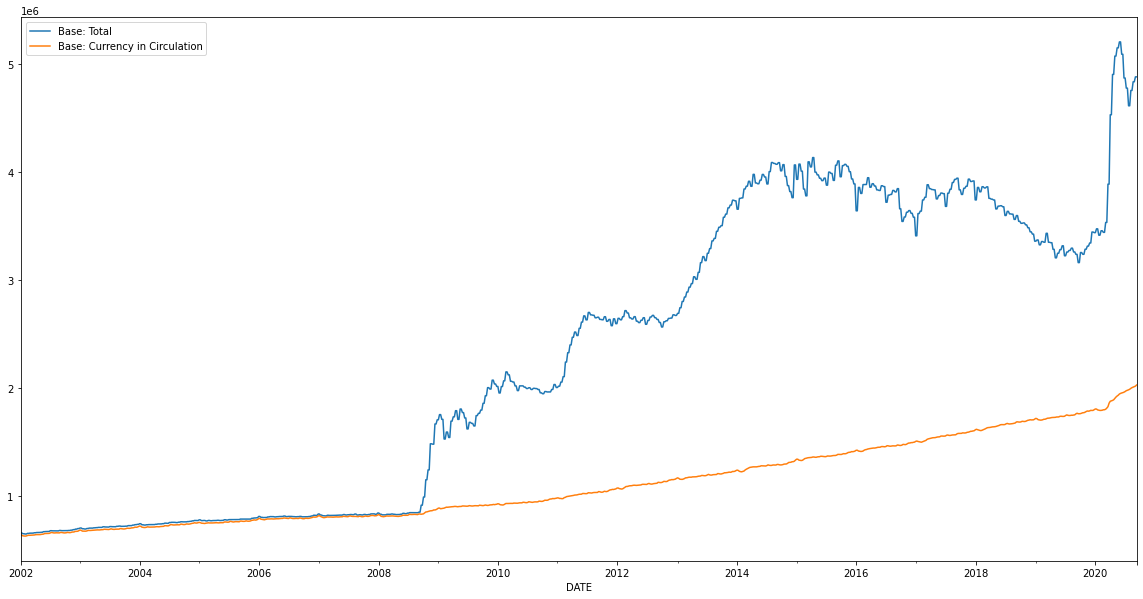

In [76]:
zz.plot.line(figsize = (20,10))

# The orange line is the direct support for expenditures

<Axes: xlabel='DATE'>

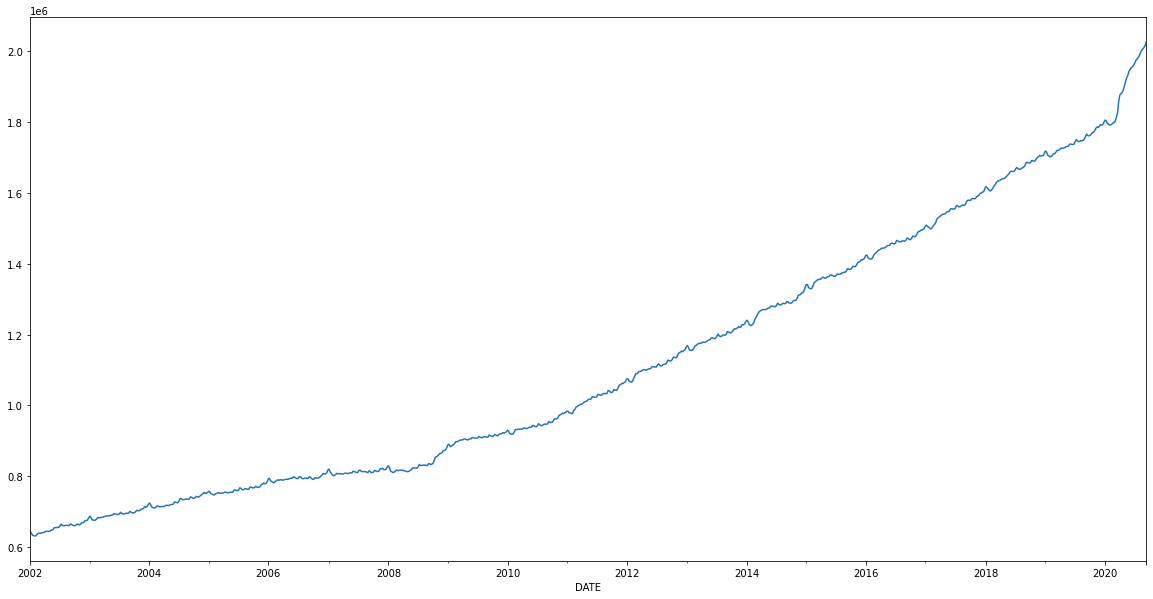

In [78]:
fig, ax = plt.subplots(figsize=(20,10))
zz['Base: Currency in Circulation'].plot.line(ax=ax)

In [116]:
data_codes  = {"Base: Total ($ Mil)": "BOGMBASE",
               "Base: Currency in Circulation ($ Mil)": "WCURCIR",
               # Assets (Loans the fed makes)
               "Balance Sheet: Total Assets ($ Mil)": "WALCL",
               "Balance Sheet Securities, Prem-Disc, Repos, and Loans ($ Mil)": "WSRLL",
               "Balance Sheet: Securities Held Outright ($ Mil)": "WSHOSHO",
               ### breakdown of securities holdings ###
               "Balance Sheet: U.S. Treasuries Held Outright ($ Mil)":"WSHOTSL",
               "Balance Sheet: Federal Agency Debt Securities ($ Mil)" : "WSHOFADSL",
               "Balance Sheet: Mortgage-Backed Securities ($ Mil)": "WSHOMCB",
               # other forms of lending
               "Balance Sheet: Repos ($ Mil)": "WORAL",
               "Balance Sheet: Central Bank Liquidity Swaps ($ Mil)" : "SWPT",
               "Balance Sheet: Direct Lending ($ Mil)" : "WLCFLL",
               # unamortized value of securities held (due to changes in interest rates)
               "Balance Sheet: Unamortized Security Premiums ($ Mil)": "WUPSHO",
               # Liabilities
               "Balance Sheet: Total Liabilities ($ Mil)" : "WLTLECL",
               "Balance Sheet: Federal Reserve Notes Outstanding ($ Mil)" : "WLFN",
               "Balance Sheet: Reverse Repos ($ Mil)": "WLRRAL",
               ### Major share of deposits 
               "Balance Sheet: Excess Reserves ($ Mil)": "EXCSRESNW",
               "Balance Sheet: Required Reserves ($ Mil)": "RESBALREQW",
               "Balance Sheet: Total Reserves ($ Mil)": "WRESBAL",
               "Balance Sheet: Deposits from Dep. Institutions ($ Mil)":"WLODLL",
               "Balance Sheet: U.S. Treasury General Account ($ Mil)": "WDTGAL",
               "Balance Sheet: Other Deposits ($ Mil)": "WOTHLB",
               "Balance Sheet: All Deposits ($ Mil)": "WLDLCL",
               # Interest Rates
               "Federal Funds Target (Pre-Crisis)": "DFEDTAR",
               "Federal Funds (Upper) Target":"DFEDTARU",
               "Effective Federal Funds Rate":"DFF",
               "Interest on Excess Reserves":"IOER",
               "Interest on Reserve Balances":"IORB",

               # Req Reserves and Vault Cash
               "Vault Cash ($ Mil)": "TLVAULTW",
               "Vault Cash Used as Req. ($ Mil)": "VAULT",
               }

data = gather_data(data_codes, start, end, freq='W')

In [117]:
data

,Base: Total ($ Mil),Base: Currency in Circulation ($ Mil),Balance Sheet: Total Assets ($ Mil),"Balance Sheet Securities, Prem-Disc, Repos, and Loans ($ Mil)",Balance Sheet: Securities Held Outright ($ Mil),Balance Sheet: U.S. Treasuries Held Outright ($ Mil),Balance Sheet: Federal Agency Debt Securities ($ Mil),Balance Sheet: Mortgage-Backed Securities ($ Mil),Balance Sheet: Repos ($ Mil),Balance Sheet: Central Bank Liquidity Swaps ($ Mil),...,Balance Sheet: U.S. Treasury General Account ($ Mil),Balance Sheet: Other Deposits ($ Mil),Balance Sheet: All Deposits ($ Mil),Federal Funds Target (Pre-Crisis),Federal Funds (Upper) Target,Effective Federal Funds Rate,Interest on Excess Reserves,Interest on Reserve Balances,Vault Cash ($ Mil),Vault Cash Used as Req. ($ Mil)
DATE,,,,,,,,,,,,,,,,,,,,,
2002-01-06,653800.0,643.044,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.402,NaN,1.75,NaN,1.665000,NaN,NaN,44707.0,33.731
2002-01-13,NaN,638.956,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.187,NaN,1.75,NaN,1.700000,NaN,NaN,44707.0,NaN
2002-01-20,NaN,632.719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.232,NaN,1.75,NaN,1.718571,NaN,NaN,43676.0,NaN
2002-01-27,NaN,632.017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.223,NaN,1.75,NaN,1.785714,NaN,NaN,43676.0,NaN
2002-02-03,654600.0,630.409,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.237,NaN,1.75,NaN,1.787143,NaN,NaN,50315.0,33.239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-06,5418700.0,2284.599,8676870.0,8566631.0,8255836.0,5574965.0,2347.0,2678523.0,1.0,203.0,...,552089.0,193.545,3798843.0,NaN,3.678571,3.508571,NaN,3.578571,NaN,NaN
2022-11-13,NaN,2288.188,8678886.0,8565174.0,8256104.0,5575232.0,2347.0,2678524.0,1.0,195.0,...,517340.0,193.788,3786654.0,NaN,4.000000,3.830000,NaN,3.900000,NaN,NaN
2022-11-20,NaN,2293.401,8625620.0,8526413.0,8214279.0,5535051.0,2347.0,2676881.0,10.0,202.0,...,472185.0,195.694,3846479.0,NaN,4.000000,3.830000,NaN,3.900000,NaN,NaN


In [121]:
plot_data = data[["Interest on Reserve Balances", "Interest on Excess Reserves"]]
match = plot_data[plot_data["Interest on Reserve Balances"] == plot_data["Interest on Excess Reserves"]]
match

,Interest on Reserve Balances,Interest on Excess Reserves
DATE,,
2021-08-01,0.15,0.15


In [123]:
match_date = match.index
match_val = match.sum(axis=1) / 2
match_date, match_val



(DatetimeIndex(['2021-08-01'], dtype='datetime64[ns]', name='DATE', freq='W-SUN'),
 DATE
 2021-08-01    0.15
 Freq: W-SUN, dtype: float64)

In [124]:
plot_data = plot_data.fillna(0)
plot_data = plot_data.sum(axis=1)
plot_data.loc[match_date] = match_val

<Axes: xlabel='DATE'>

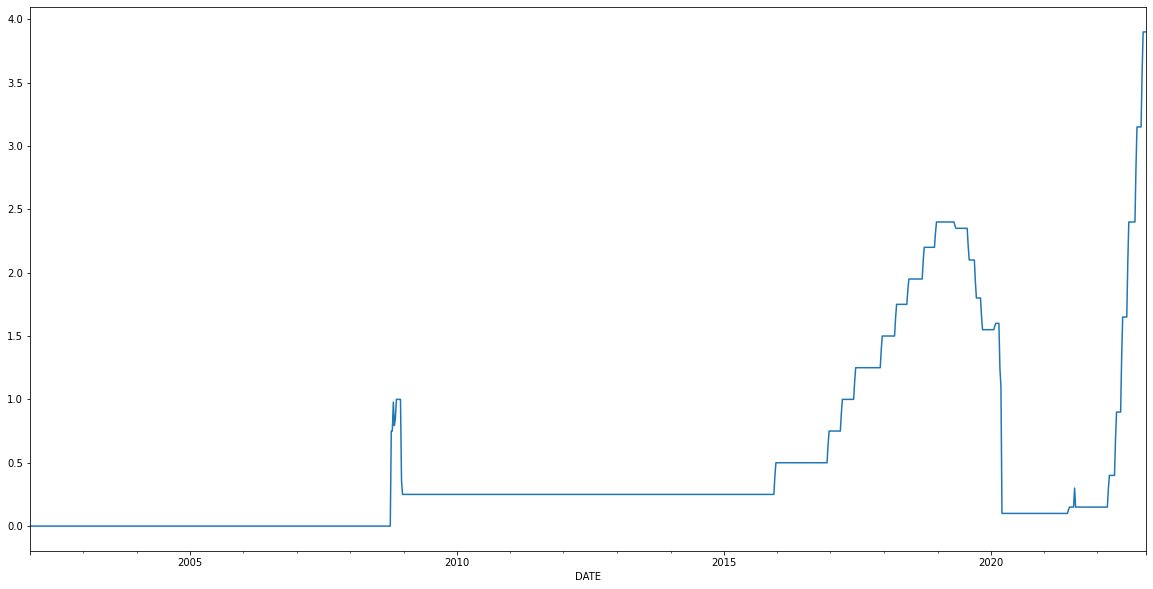

In [125]:
fig, ax = plt.subplots(figsize=(20,10))
plot_data = data[["Interest on Reserve Balances", "Interest on Excess Reserves"]]
plot_data = plot_data.fillna(0)
plot_data = plot_data.sum(axis=1)
plot_data.plot.line(ax=ax)

